In [1]:
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import PIL
import cv2

In [2]:
#kaggle competitions download -c dog-breed-identification
#https://www.kaggle.com/c/dog-breed-identification/data

## Loading and connecting the data

In [3]:
labels_df = pd.read_csv(os.path.join('..','data','labels.csv'))
labels_df

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever
...,...,...
10217,ffd25009d635cfd16e793503ac5edef0,borzoi
10218,ffd3f636f7f379c51ba3648a9ff8254f,dandie_dinmont
10219,ffe2ca6c940cddfee68fa3cc6c63213f,airedale
10220,ffe5f6d8e2bff356e9482a80a6e29aac,miniature_pinscher


In [4]:
train_path = os.path.join('..','data','train')
test_path = os.path.join('..','data','test')

In [5]:
train_df = pd.DataFrame({
    'id': [i.replace('.jpg','') for i in os.listdir(train_path)],
    'path': [f'../data/train/{i}' for i in os.listdir(train_path)],
})

train_df

,id,path
0,000bec180eb18c7604dcecc8fe0dba07,../data/train/000bec180eb18c7604dcecc8fe0dba07...
1,001513dfcb2ffafc82cccf4d8bbaba97,../data/train/001513dfcb2ffafc82cccf4d8bbaba97...
2,001cdf01b096e06d78e9e5112d419397,../data/train/001cdf01b096e06d78e9e5112d419397...
3,00214f311d5d2247d5dfe4fe24b2303d,../data/train/00214f311d5d2247d5dfe4fe24b2303d...
4,0021f9ceb3235effd7fcde7f7538ed62,../data/train/0021f9ceb3235effd7fcde7f7538ed62...
...,...,...
10217,ffd25009d635cfd16e793503ac5edef0,../data/train/ffd25009d635cfd16e793503ac5edef0...
10218,ffd3f636f7f379c51ba3648a9ff8254f,../data/train/ffd3f636f7f379c51ba3648a9ff8254f...
10219,ffe2ca6c940cddfee68fa3cc6c63213f,../data/train/ffe2ca6c940cddfee68fa3cc6c63213f...
10220,ffe5f6d8e2bff356e9482a80a6e29aac,../data/train/ffe5f6d8e2bff356e9482a80a6e29aac...


In [6]:
train_label_merge_df = pd.merge(
    left=train_df,
    right=labels_df,
    left_on='id',
    right_on='id'
)
train_label_merge_df.to_csv(os.path.join('..','data','train_label_merge_df.csv'), index=False)
train_label_merge_df

,id,path,breed
0,000bec180eb18c7604dcecc8fe0dba07,../data/train/000bec180eb18c7604dcecc8fe0dba07...,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,../data/train/001513dfcb2ffafc82cccf4d8bbaba97...,dingo
2,001cdf01b096e06d78e9e5112d419397,../data/train/001cdf01b096e06d78e9e5112d419397...,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,../data/train/00214f311d5d2247d5dfe4fe24b2303d...,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,../data/train/0021f9ceb3235effd7fcde7f7538ed62...,golden_retriever
...,...,...,...
10217,ffd25009d635cfd16e793503ac5edef0,../data/train/ffd25009d635cfd16e793503ac5edef0...,borzoi
10218,ffd3f636f7f379c51ba3648a9ff8254f,../data/train/ffd3f636f7f379c51ba3648a9ff8254f...,dandie_dinmont
10219,ffe2ca6c940cddfee68fa3cc6c63213f,../data/train/ffe2ca6c940cddfee68fa3cc6c63213f...,airedale
10220,ffe5f6d8e2bff356e9482a80a6e29aac,../data/train/ffe5f6d8e2bff356e9482a80a6e29aac...,miniature_pinscher


In [7]:
train_label_merge_df.breed.unique()

array(['boston_bull', 'dingo', 'pekinese', 'bluetick', 'golden_retriever',
       'bedlington_terrier', 'borzoi', 'basenji', 'scottish_deerhound',
       'shetland_sheepdog', 'walker_hound', 'maltese_dog',
       'norfolk_terrier', 'african_hunting_dog',
       'wire-haired_fox_terrier', 'redbone', 'lakeland_terrier', 'boxer',
       'doberman', 'otterhound', 'standard_schnauzer',
       'irish_water_spaniel', 'black-and-tan_coonhound', 'cairn',
       'affenpinscher', 'labrador_retriever', 'ibizan_hound',
       'english_setter', 'weimaraner', 'giant_schnauzer', 'groenendael',
       'dhole', 'toy_poodle', 'border_terrier', 'tibetan_terrier',
       'norwegian_elkhound', 'shih-tzu', 'irish_terrier', 'kuvasz',
       'german_shepherd', 'greater_swiss_mountain_dog', 'basset',
       'australian_terrier', 'schipperke', 'rhodesian_ridgeback',
       'irish_setter', 'appenzeller', 'bloodhound', 'samoyed',
       'miniature_schnauzer', 'brittany_spaniel', 'kelpie', 'papillon',
       'borde

In [8]:
test_df = pd.DataFrame({
    'id': [i.replace('.jpg','') for i in os.listdir(test_path)],
    'path': [f'../data/train{i}' for i in os.listdir(test_path)],
})

test_df.to_csv(os.path.join('..','data','test_df.csv'), index=False)
test_df

,id,path
0,000621fb3cbb32d8935728e48679680e,../data/train000621fb3cbb32d8935728e48679680e.jpg
1,00102ee9d8eb90812350685311fe5890,../data/train00102ee9d8eb90812350685311fe5890.jpg
2,0012a730dfa437f5f3613fb75efcd4ce,../data/train0012a730dfa437f5f3613fb75efcd4ce.jpg
3,001510bc8570bbeee98c8d80c8a95ec1,../data/train001510bc8570bbeee98c8d80c8a95ec1.jpg
4,001a5f3114548acdefa3d4da05474c2e,../data/train001a5f3114548acdefa3d4da05474c2e.jpg
...,...,...
10352,ffeda8623d4eee33c6d1156a2ecbfcf8,../data/trainffeda8623d4eee33c6d1156a2ecbfcf8.jpg
10353,fff1ec9e6e413275984966f745a313b0,../data/trainfff1ec9e6e413275984966f745a313b0.jpg
10354,fff74b59b758bbbf13a5793182a9bbe4,../data/trainfff74b59b758bbbf13a5793182a9bbe4.jpg
10355,fff7d50d848e8014ac1e9172dc6762a3,../data/trainfff7d50d848e8014ac1e9172dc6762a3.jpg


## Playing with the images

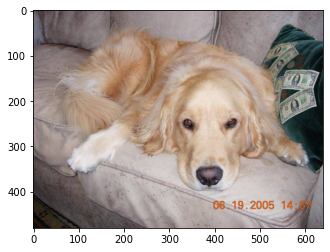

In [9]:
sample_of_25 = train_label_merge_df.sample(25).reset_index(drop=True)
sample_of_25_breed = sample_of_25.breed.to_list()

import matplotlib.image as mpimg

img=mpimg.imread(sample_of_25.path.to_list()[0])
imgplot = plt.imshow(img[:, :, :])

In [10]:
# sample_of_25 = train_label_merge_df.sample(25).reset_index(drop=True)
im = cv2.imread(sample_of_25.path.to_list()[0])

print(type(im))
# <class 'numpy.ndarray'>

print(im.shape)
print(type(im.shape))

print("---------------------------------------------------------------")
h, w, c = im.shape
print('width:  ', w)
print('height: ', h)
print('channel:', c)

print("---------------------------------------------------------------")
h, w, _ = im.shape
print('width: ', w)
print('height:', h)

print("---------------------------------------------------------------")
print('width: ', im.shape[1])
print('height:', im.shape[0])

print("---------------------------------------------------------------")
print(im.shape[1::-1])

<class 'numpy.ndarray'>
(480, 640, 3)
<class 'tuple'>
---------------------------------------------------------------
width:   640
height:  480
channel: 3
---------------------------------------------------------------
width:  640
height: 480
---------------------------------------------------------------
width:  640
height: 480
---------------------------------------------------------------
(640, 480)
